## ¿Qué son las entradas y salidas?
Los modelos no se entrenan a sí mismos, se entrenan con datos y dos fragmentos de código: la función objetivo y el optimizador.

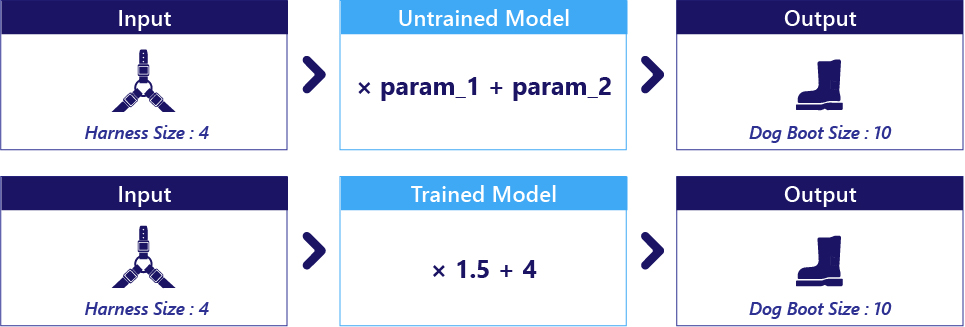

### El objetivo
El objetivo de nuestro escenario es poder calcular la talla de las botas de un perro en función de la talla de su arnés.

Para que un equipo pueda comprender nuestro objetivo, debemos proporcionárselo como un fragmento de código denominado función objetivo (también conocido como función de costo). Las funciones objetivo evalúan si el modelo es eficaz (es decir, si calcula la talla correcta de las botas) o no (es decir, si se equivoca a la hora de calcular la talla de las botas). Trataremos las funciones objetivo en profundidad en el material de aprendizaje posterior.

### Datos
También se denominan **entradas**, en nuestro escenario se corresponde con la talla del arnés.

Los datos también se refieren a la información que la función objetivo podría necesitar. Por ejemplo, si nuestra función objetivo nos indica si el modelo ha predicho la talla correcta de las botas, necesitará saber cuál es la talla correcta de las botas. Este es el motivo por el que, en el ejercicio anterior, proporcionamos tanto las tallas de los arneses como las respuestas correctas al código de entrenamiento.

### El optimizador
El optimizador es un código que, a continuación, cambia los parámetros del modelo para que sea más eficaz la próxima vez.

No solemos escribir nuestros propios optimizadores, sino que usamos marcos de código abierto en los que ya se ha hecho el trabajo duro.

### Puntos importantes
Es importante tener en cuenta que el objetivo, los datos y el optimizador son simplemente un medio para entrenar el modelo. No son necesarios una vez completado el entrenamiento. También es importante recordar que el entrenamiento solo cambia los valores de parámetro dentro del modelo, es decir, no cambia el tipo de modelo que se usa.

### Cargando datos con Pandas
En el ejercicio anterior los datos los pasamos directamente, en esta ocasión con la ayuda de Pandas, vamos a leer los datos de un archivo csv llamado `doggy-boot-harness.csv`.

In [1]:
import pandas
# Read the text file containing data using pandas
dataset = pandas.read_csv('doggy-boot-harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


Ahora vamos a eliminar las columnas `sex` y `age_years`.

In [2]:
# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)

Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


### Filtrando datos por Rows
Para obtener los primero datos de la tabla podemos usar la función `head()` y para obtener los últimos datos de la tabla usamos la función `tail()`.

In [3]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


Igualmente podemos filtrar datos de manera lógica, en el siguiente bloque se realiza una evaluación lógica para obtener los tamaños de harness menores a 55.

In [4]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

Ahora veamos cuantos datos tenemos donde el tamaño de la bota del lomito es menor a 40.

In [5]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


### Graficando datos
Ahora con la ayuda del código en el archivo `graphing.py` vamos a hacer una gráfica para mirar el tamaño del harness vs el tamaño de la bota.

In [6]:
# Load and prepare plotly to create our graphs
import plotly.express
import graphing # this is a custom file you can find in our code on github

# Show a graph of harness size by boot size:
plotly.express.scatter(data_smaller_paws, x="harness_size", y="boot_size")

### Creando una nueva columna
Agregaremos una nueva columna llamada `harness_size_imperial` para ver los tamaños del arnés en unidades imperiales (pulgadas).

In [7]:
# Convert harness sizes from metric to imperial units 
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plotly.express.scatter(data_smaller_paws, x="harness_size_imperial", y="boot_size")